<a href="https://colab.research.google.com/github/kiryu-3/Prmn2023_DS/blob/main/Python/Python_Stats/Stats_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 検定力

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import t
from scipy.stats import f
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.api import qqplot
from statsmodels.stats.power import TTestIndPower

## 第1種の誤りと第2種の誤り

仮説検定が誤るケースには、二通りあります。  
これをそれぞれ**第1種の誤り**と**第2種の誤り**と呼びます。

![リンクテキスト](https://imgur.com/etV1jI0.png)

### 第1種の誤り

帰無仮説が正しいのにも関わらず，検定の結果帰無仮説を棄却してしまう誤りを  
**第1種の誤り**と呼びます。($\alpha$で表します)

第1種の誤りは**有意水準と等しくなります**。

### 第2種の誤り

帰無仮説が正しくないにも関わらず，検定の結果帰無仮説を採択してしまう誤りを  
**第2種の誤り**と呼びます。（$\beta$で表します）

帰無仮説が正しい場合の検定統計量の分布を**帰無分布**、  
対立仮説が正しい場合の検定統計量の分布を**対立分布**といいます。

### $\alpha$と$\beta$のトレードオフ

検定の際、この2つの誤りはなるべく下げたいものです。

しかし$\alpha$と$\beta$は**トレードオフ**の関係にあり、同時に下げることはできません。  
（視覚的に理解したい方は[こちら](https://bit.ly/3S1J6AM))


## 検定力

「どれだけ正しく帰無仮説を棄却し、対立仮説を成立できるか」  
を表す指標のことを**検定力(power)** といいます。検出力ともいいます。

![リンクテキスト](https://imgur.com/c6Zx3gQ.png)

検定力は、対立仮説が正しい場合に帰無仮説を棄却する確率です。  
よって、$1-\beta$ になります。

検出力がバランスの良い値であると、より正しい仮説検定を行うことができます。

検定力に影響を与える要素は3つ存在します。  
* 有意水準
* サンプルサイズ
* 帰無分布と対立分布の差

### 有意水準

$\alpha$の値を大きくすると、$\beta$の値が小さくなるため、  
検定力$1-\beta$の値が大きくなります。

しかし、有意水準は特段変更しないのが慣習になります。  
5%か1%を使うようにしましょう。

### サンプルサイズ

サンプルサイズを大きくすると、標本統計量の分布のバラつきが小さくなるため、  
検定力$1-\beta$の値が大きくなります。

（標本統計量のバラつきがなくなり、母集団の統計量の近くに集まるようになる）  
（視覚的に確認したい方は[こちら](https://bit.ly/414MZJ6)）

しかしやみくもにサンプルサイズを上げて検定力を大きくすると、  
微妙な差であっても「有意差あり」と判定されてしまいます。  

そのため、サンプルサイズをとにかく大きくすればよいわけではありません。

### 効果量

帰無分布と対立分布の差を表す量を**効果量**といいます。

効果量が大きいと、検定力の値が大きくなります。  
（視覚的に確認したい方は[こちら](https://bit.ly/3IapHZV)）

## 検定力分析1

ここからの流れは[こちら](https://bellcurve.jp/statistics/course/12769.html)にもう少し詳しい説明があります。  



今回は、「対応なしの2群の平均差の検定」を例とし、検定力分析を行います。

このとき、効果量は「2群の平均値差にどれくらいの差があるかを表す量」になります。



$p$値だけでは、平均値の差がどれくらいあるかを判断することはできません。  
（$p$値はサンプルサイズが大きくなると簡単に小さくなるため）

「有意差があること」を表す$p$値とともに、  
「どの程度の有意差があるのか」を表す効果量を合わせて報告することが大事になります。



効果量は、2つの母集団の平均の差を標準化して導出します。

$$
\frac{\mu_1-\mu_2}{\sigma}
$$

分母には、2つの母集団を合わせた標準偏差を指定しています。

分子、分母ともに不定値なので、標本値を使用して近似します。

$$
\frac{\bar{x}_1-\bar{x}_2}{\hat{\sigma}}
$$

分母には、2つの標本を合わせた標準偏差を指定しています。  
（難しいですが、スチューデントの$t$検定と同じ要領です）

$$
\hat{\sigma} = \sqrt{\frac{(n_1-1)s^{'2}_1+(n_2-1)s^{'2}_2}{n_1+n_2-2}}
$$

この効果量の指標のことを **Cohen's d**（コーエンのd）といいます。

標準化していますが、$1$を超えることもあります。  
また、実際には絶対値を取ることも多いです。

Cohen's d の目安は以下の表のようになります。

|Cohen's d|大きさ|
| :---: | :---: |
|0.2|小|
|0.5|中|
|0.8|大|

## 検定力分析2

手元に標本がない場合に、適切なサンプルサイズを求めたい場合もあります。  
検定力分析によって導出することができます。

**有意水準**・**効果量**・**検定力** の3つが分かっていれば、  
サンプルサイズを求めることができます。

**有意水準**は普通$5$%を指定します。

**効果量**は今までの経験則から仮定します。  
＜例＞ 「男女間で平均睡眠時間に差はないだろう」から$0.2$にしよう

**検定力**は多くの場合$0.8$を指定します。  
これは、「80％の確率で、有意差があるときにそれを正しく検出できる」ことを意味します。

## Pythonによる検定力分析

都道府県別の男性と女性の平均睡眠時間について、検定力分析を行います。

`todohuken_kaidata.csv`をインポートしてください。

In [8]:
df = pd.read_csv("todohuken_kaidata.csv")
df.head(3)

,都道府県,地方,15歳以上の平均睡眠時間（男）,15歳以上の平均睡眠時間（女）,運転免許保有者割合（%）,農業従事者（人口100人あたり）,平均通勤時間（片道）,自動車保有台数（人口100人あたり）,鉄道旅客輸送量(人口一人あたり)
0,北海道,北海道地方,473,465,63.4,1.79,20.2,68.67,65.90
1,青森県,東北地方,486,470,66.4,4.95,20.2,77.65,13.10
2,岩手県,東北地方,477,469,67.6,5.50,20.0,80.55,20.86


In [30]:
male_sleep = df["15歳以上の平均睡眠時間（男）"]
female_sleep = df["15歳以上の平均睡眠時間（女）"] 

In [31]:
# Cohen's dを返す関数
def cohen_d(x1,x2):
  n1 = len(x1)
  n2 = len(x2)
  dof = n1 + n2 - 2
  std = np.sqrt(((n1-1)*stats.tvar(x1) + (n2-1)*stats.tvar(x2))/dof)
  return (np.mean(x1) - np.mean(x2)) / std

In [32]:
cohen_d(male_sleep,female_sleep)

1.719993575725184

効果量はかなり大きい値となりました。  
男女間の睡眠時間の差を明確に確認できます。

効果量がかなり大きいため、検定力もかなり大きくなってしまっていると推測できます。

In [34]:
power = TTestIndPower()
effect_size = cohen_d(male_sleep,female_sleep)
n1 = len(male_sleep)
n2 = len(female_sleep)

stats_power = power.solve_power(effect_size=effect_size , nobs1=n1 , alpha=0.05 , power = None , ratio=n2/n1)
stats_power

1.0

検定力が$1.0$になってしまいました。  
このままでは、微妙な差であっても「有意差あり」と判定されてしまいます。

In [35]:
tt , pp = stats.ttest_ind(male_sleep , female_sleep , equal_var=False)

nk = float(Decimal(str(tt)).quantize(Decimal('0.001'),rounding=ROUND_HALF_UP))
print(f"検定統計量のt値:{nk}")
nkp = float(Decimal(str(pp*100)).quantize(Decimal('0.000000000001'),rounding=ROUND_HALF_UP))
print(f"p値：{nkp}%")

検定統計量のt値:8.338
p値：7.4e-11%


適切なサンプルサイズを設定することで、検定力を$0.8$に近づけることができます。

In [37]:
power.solve_power(effect_size=effect_size , nobs1=None , alpha=0.05 , power = 0.8 , ratio=n2/n1)

6.424621062110947

検定力を$0.8$、効果量を母集団の効果量で仮定したとき、  
標本を$7$くらい取ってくるとよいことが分かりました。

実際に標本を抽出して検定力分析を行います。

In [39]:
new_df = df.sample(7,random_state=0)  # 乱数を固定
new_df.head(3)

,都道府県,地方,15歳以上の平均睡眠時間（男）,15歳以上の平均睡眠時間（女）,運転免許保有者割合（%）,農業従事者（人口100人あたり）,平均通勤時間（片道）,自動車保有台数（人口100人あたり）,鉄道旅客輸送量(人口一人あたり)
28,奈良県,近畿地方,461,444,65.9,1.42,41.0,59.99,124.49
33,広島県,中国地方,466,452,66.0,1.33,25.1,64.89,68.84
30,鳥取県,中国地方,469,456,67.8,4.55,18.3,81.54,18.46


In [40]:
new_male_sleep = new_df["15歳以上の平均睡眠時間（男）"]
new_female_sleep = new_df["15歳以上の平均睡眠時間（女）"] 

In [42]:
power = TTestIndPower()
new_effect_size = cohen_d(new_male_sleep , new_female_sleep)
n1 = len(new_male_sleep)
n2 = len(new_female_sleep)

stats_power = power.solve_power(effect_size=new_effect_size , nobs1=n1 , alpha=0.05 , power = None , ratio=n2/n1)
stats_power

0.5246489089398916

効果量の値が変わるので検定力を$0.8$に限りなく近づけることは難しいですが、  
検定力を小さくすることができました。

In [43]:
tt , pp = stats.ttest_ind(new_male_sleep , new_female_sleep , equal_var=False)

nk = float(Decimal(str(tt)).quantize(Decimal('0.001'),rounding=ROUND_HALF_UP))
print(f"検定統計量のt値:{nk}")
nkp = float(Decimal(str(pp*100)).quantize(Decimal('0.000000000001'),rounding=ROUND_HALF_UP))
print(f"p値：{nkp}%")

検定統計量のt値:2.199
p値：4.842689151313%


## Pythonによる描画

それぞれの効果量における、検定力の推移を描画することができます。  

ここでは$x$軸にサンプルサイズ、  
$y$軸に検定力を取ります。

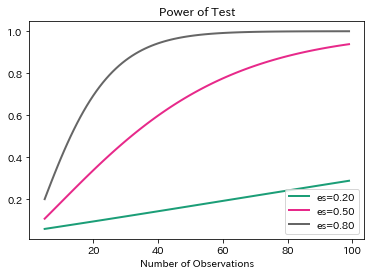

In [53]:
fig = power.plot_power(dep_var="nobs" , nobs=np.array(range(5,100)) ,
                       effect_size=[0.2,0.5,0.8])

効果量を仮定することさえできれば、  
サンプルサイズの目安を定めることができます。